In [ ]:
# %%capture
# !pip install -U corus==0.10.0 tiktoken==0.10.0 youtokentome==1.0.6 sentence_transformers==5.0.0 numpy==2.0.2 matplotlib==3.10.0 torch==2.6.0+cu124 transformers==4.55.0 datasets==4.0.0

In [ ]:
%%capture
!wget https://github.com/yutkin/Lenta.Ru-News-Dataset/releases/download/v1.0/lenta-ru-news.csv.gz

In [ ]:
from corus import load_lenta

path = 'lenta-ru-news.csv.gz'
records = load_lenta(path)
next(records)

LentaRecord(
    url='https://lenta.ru/news/2018/12/14/cancer/',
    title='Названы регионы России с\xa0самой высокой смертностью от\xa0рака',
    text='Вице-премьер по социальным вопросам Татьяна Голикова рассказала, в каких регионах России зафиксирована наиболее высокая смертность от рака, сообщает РИА Новости. По словам Голиковой, чаще всего онкологические заболевания становились причиной смерти в Псковской, Тверской, Тульской и Орловской областях, а также в Севастополе. Вице-премьер напомнила, что главные факторы смертности в России — рак и болезни системы кровообращения. В начале года стало известно, что смертность от онкологических заболеваний среди россиян снизилась впервые за три года. По данным Росстата, в 2017 году от рака умерли 289 тысяч человек. Это на 3,5 процента меньше, чем годом ранее.',
    topic='Россия',
    tags='Общество',
    date=None
)

In [ ]:
dataset = [next(records).text for i in range(1000)]
dataset[0]

'Австрийские правоохранительные органы не представили доказательств нарушения российскими биатлонистами антидопинговых правил. Об этом сообщил посол России в Вене Дмитрий Любинский по итогам встречи уполномоченного адвоката дипмиссии с представителями прокуратуры страны, передает ТАСС. «Действует презумпция невиновности. Каких-либо ограничений свободы передвижения для команды нет», — добавили в посольстве. Международный союз биатлонистов (IBU) также не будет применять санкции к российским биатлонистам. Все они продолжат выступление на Кубке мира. Полиция нагрянула в отель сборной России в Хохфильцене вечером 12 декабря. Как написал биатлонист Александр Логинов, их считают виновными в махинациях с переливанием крови. Биатлонисту Антону Шипулину, также попавшему в список, полиция нанесла отдельный визит: сейчас он тренируется отдельно в австрийском Обертиллахе. Обвинения спортсмен назвал бредом, а также указал на «охоту на ведьм» в мировом биатлоне. В Австрии прием допинга — уголовное пр

## Токенизация

Токенизация — процесс предобработки входного текста в список токенов. Обычно далее каждый токен векторизуется, и весь этот массив векторов подаётся модели на вход, с чем она начинает работать.

В моделях архитектуры Transformer токенизаторы обучаемы. Обучение токенизаторов не схоже с тем, как обучаются ML-модели, наоборот, это статистический процесс, который определяет, какие сочетания символов (подслов, слов) лучше всего выбрать для корпуса текста, с которым мы работаем.

### BPE

BPE активно используется в GPT-like моделях, обучается слиянием символов из основного корпуса, выбирая пары по наибольшей частоте встречаемости

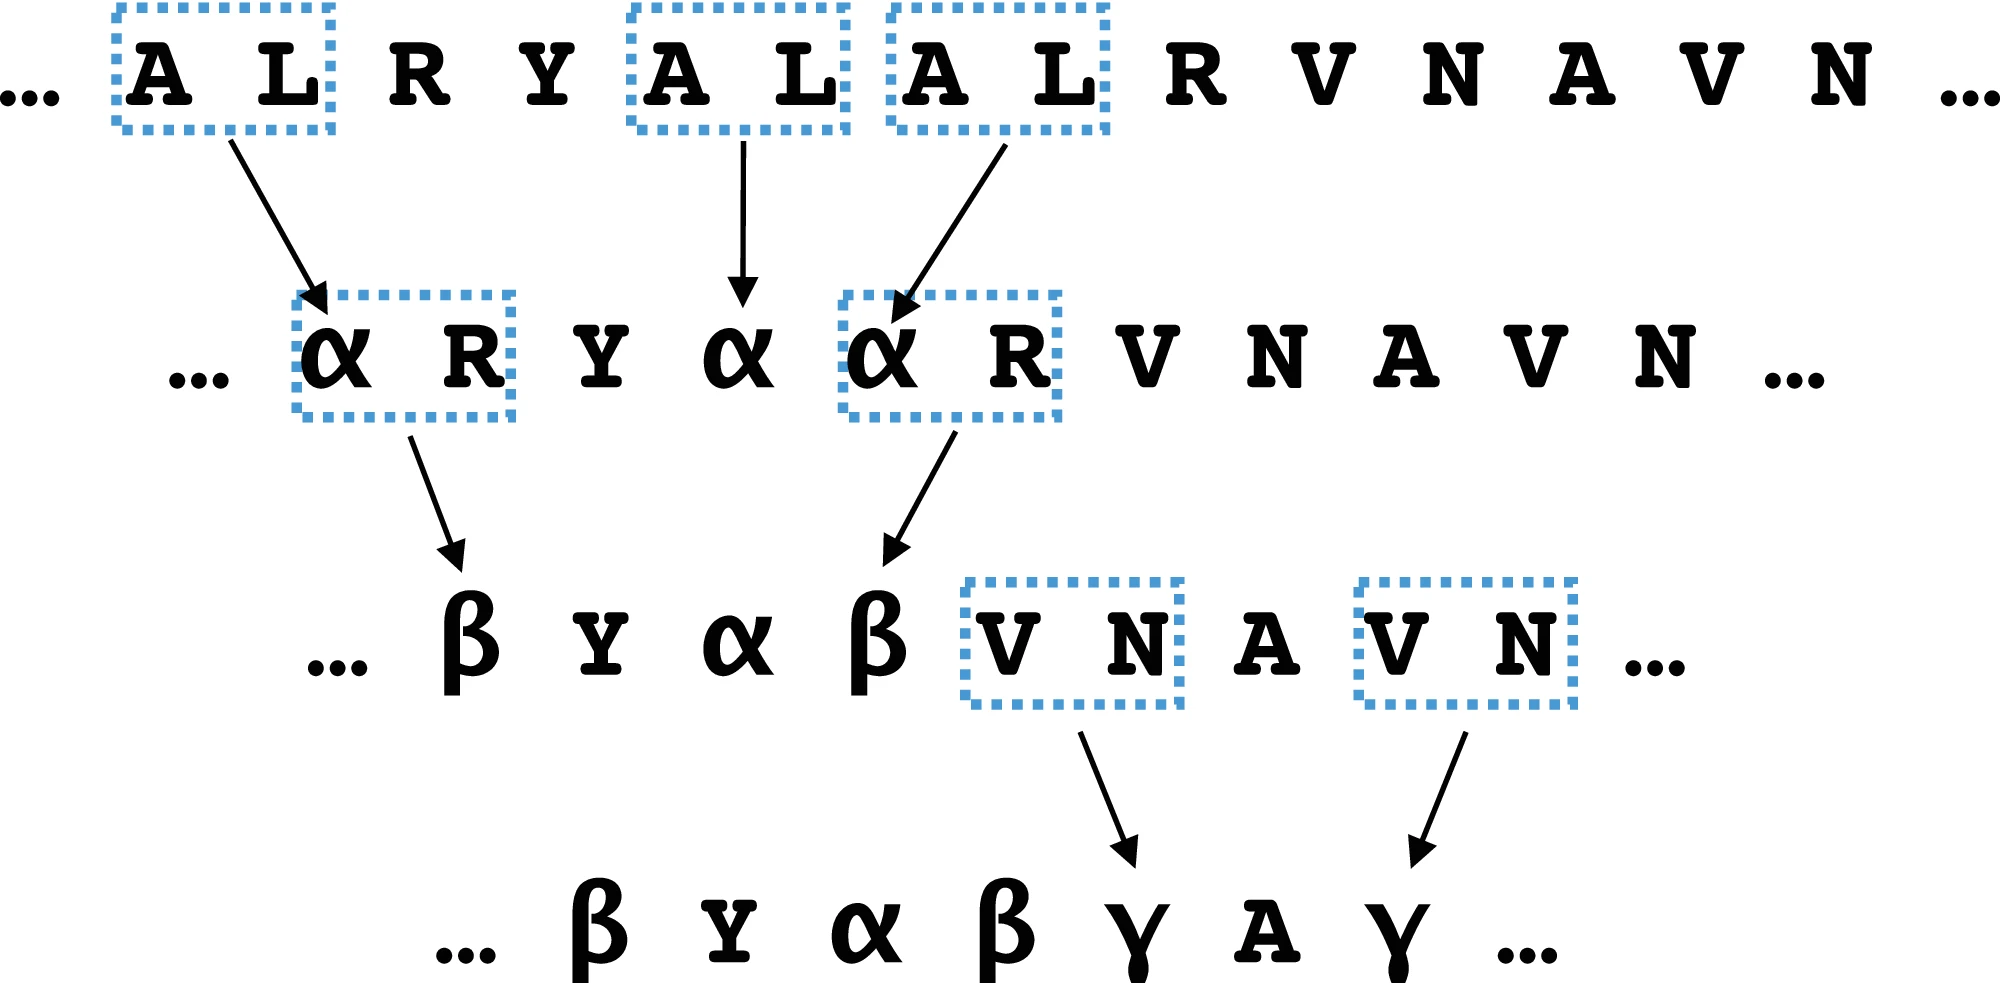

#### Нужен ли препроцессинг?

GPT-2 [encoder.py](https://github.com/openai/gpt-2/blob/master/src/encoder.py) - GPT-2 BPE для инференса

In [ ]:
import regex as re

gpt2pat = re.compile(r"""'s|'t|'re|'ve|'m|'ll|'d| ?\p{L}+| ?\p{N}+| ?[^\s\p{L}\p{N}]+|\s+(?!\S)|\s+""")

print(re.findall(gpt2pat, "Hi, how are you? I'm fine. qwe123   test"))

['Hi', ',', ' how', ' are', ' you', '?', ' I', "'m", ' fine', '.', ' qwe', '123', '  ', ' test']


#### Tiktoken

[tiktoken](https://github.com/openai/tiktoken) - `is a fast BPE tokeniser for use with OpenAI's models`


Основная задача tiktoken — разбивать текст на токены (фрагменты текста), которые используются языковыми моделями для обработки и генерации текста.

Алгоритм BPE обеспечивает обратимость операции (можно восстановить исходный текст по токенам) и эффективное кодирование слов и подслов, в том числе тех, которых не было в обучающем наборе.

tiktoken поддерживает разные схемы кодирования — для моделей GPT-4, GPT-3.5, Codex, и других.

С помощью tiktoken можно:

- Определять количество токенов в тексте

- Кодировать и декодировать текст


##### Encode/decode

In [ ]:
import tiktoken

enc = tiktoken.get_encoding("gpt2")
tokens = enc.encode("    hello world!!!")
print(tokens)

[220, 220, 220, 23748, 995, 10185]


In [ ]:
len(tokens)

6

In [ ]:
enc.decode(tokens)

'    hello world!!!'

##### educational демонстрация

In [ ]:
from tiktoken._educational import *

# Visualise how the GPT-4 encoder encodes text
enc = SimpleBytePairEncoding.from_tiktoken("cl100k_base")

Выходные данные были обрезаны до нескольких последних строк (5000).
The current most common pair is b' ' + b'en'
So we made b' en' our 324th token
Now the first fifty words in our training data look like:
"""This is an educational implementation of the byte pair encoding algorithm."""

from __future__ import annotations

import collections

import regex

import tiktoken


class SimpleBytePairEncoding:
    def __init__(self, *, pat_str:


The current most common pair is b'u' + b'al'
So we made b'ual' our 325th token
Now the first fifty words in our training data look like:
"""This is an educational implementation of the byte pair encoding algorithm."""

from __future__ import annotations

import collections

import regex

import tiktoken


class SimpleBytePairEncoding:
    def __init__(self, *, pat_str:


The current most common pair is b'\n        ' + b'    '
So we made b'\n            ' our 326th token
Now the first fifty words in our training data look like:
"""This is an educational

In [ ]:
enc.encode("hello world aaaaaaaaaaaa")

hello
hello
hello
hello
hello

 world
 world
 world
 world
 world
 world

 aaaaaaaaaaaa
 aaaaaaaaaaaa
 aaaaaaaaaaaa
 aaaaaaaaaaaa
 aaaaaaaaaaaa
 aaaaaaaaaaaa
 aaaaaaaaaaaa
 aaaaaaaaaaaa
 aaaaaaaaaaaa
 aaaaaaaaaaaa
 aaaaaaaaaaaa



[15339, 1917, 264, 70540, 33746]

#### YouTokenToMe

[YouTokenToMe](https://github.com/vkcom/YouTokenToMe) представляет собой  текстовый токенизатор, ориентированный на эффективность вычислений. В настоящее время он реализует Byte Pair Encoding  (BPE). Эта реализация намного быстрее в обучении и токенизации, чем Hugging Face, fastBPE и SentencePiece. В некоторых тестовых случаях она работает в 90 раз быстрее.

In [ ]:
import youtokentome as yttm

In [ ]:
with open('dataset.txt', "w") as f:
    for i in range(1000):
        print(dataset[i], file=f)

In [ ]:
%%time
model_name = 'bpe_vk.model'
yttm.BPE.train(data='dataset.txt', vocab_size=5000, model=model_name)

CPU times: user 394 ms, sys: 104 ms, total: 498 ms
Wall time: 321 ms


In [ ]:
bpe = yttm.BPE(model=model_name)
print(bpe.encode([dataset[0]], output_type=yttm.OutputType.ID))

[[1985, 4588, 587, 2396, 355, 769, 212, 236, 839, 198, 3682, 300, 323, 1080, 827, 476, 2269, 2998, 200, 245, 243, 4738, 4862, 797, 1692, 409, 375, 1282, 202, 480, 14, 440, 186, 244, 559, 1861, 497, 33, 2754, 472, 202, 3128, 1364, 266, 227, 899, 2879, 477, 312, 2881, 216, 604, 18, 243, 1633, 187, 839, 2941, 3434, 1553, 2909, 1240, 2582, 1320, 265, 1827, 275, 546, 17, 18, 524, 236, 231, 341, 2281, 669, 900, 3327, 4241, 736, 3715, 1651, 231, 808, 443, 3946, 1694, 314, 278, 1006, 198, 186, 202, 480, 210, 699, 29, 4185, 360, 238, 2280, 4357, 189, 357, 108, 106, 128, 66, 499, 236, 639, 261, 2622, 228, 4389, 264, 3096, 2998, 200, 245, 577, 1319, 814, 1977, 10, 2378, 751, 209, 1448, 22, 389, 4582, 3108, 524, 209, 24, 287, 4817, 186, 192, 300, 3240, 440, 186, 4870, 3729, 957, 911, 956, 2223, 4357, 1515, 3826, 25, 658, 4892, 3468, 696, 186, 407, 679, 191, 4207, 187, 415, 1689, 1307, 4150, 1248, 3525, 2807, 200, 417, 951, 193, 299, 3308, 376, 198, 2647, 499, 1525, 4928, 186, 1296, 480, 1528, 2737

In [ ]:
print(bpe.encode([dataset[0]], output_type=yttm.OutputType.SUBWORD))

[['▁Ав', 'стрий', 'ские', '▁правоохранитель', 'ные', '▁орга', 'ны', '▁не', '▁представи', 'ли', '▁доказа', 'тель', 'ств', '▁нару', 'шения', '▁россий', 'скими', '▁биатло', 'ни', 'ста', 'ми', '▁антидо', 'пинговых', '▁прави', 'л.', '▁Об', '▁этом', '▁сообщил', '▁по', 'со', 'л', '▁России', '▁в', '▁В', 'ене', '▁Дмитрий', '▁Л', 'ю', 'бин', 'ский', '▁по', '▁итогам', '▁встре', 'чи', '▁у', 'пол', 'номо', 'чен', 'ного', '▁адвока', 'та', '▁ди', 'п', 'ми', 'ссии', '▁с', '▁представи', 'телями', '▁прокура', 'туры', '▁страны,', '▁передает', '▁ТАСС.', '▁«Д', 'ей', 'ствует', '▁пре', 'зу', 'м', 'п', 'ция', '▁не', 'ви', 'нов', 'ности.', '▁Ка', 'ких', '-либо', '▁огранич', 'ений', '▁свободы', '▁перед', 'ви', 'жения', '▁для', '▁команды', '▁нет', '»,', '▁—', '▁добави', 'ли', '▁в', '▁по', 'со', 'ль', 'стве', '.', '▁Международ', 'ный', '▁со', 'юз', '▁биатлонист', 'ов', '▁(', 'I', 'B', 'U', ')', '▁также', '▁не', '▁будет', '▁при', 'меня', 'ть', '▁санкции', '▁к', '▁российским', '▁биатло', 'ни', 'ста', 'м.', '▁Все',

#### transformers AutoTokenizer

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("gpt2")

text = "Hello, how are you?"
encoded_input = tokenizer(text)
encoded_input

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:86: UserWarning: 
Access to the secret `HF_TOKEN` has not been granted on this notebook.
You will not be requested again.
Please restart the session if you want to be prompted again.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

{'input_ids': [15496, 11, 703, 389, 345, 30], 'attention_mask': [1, 1, 1, 1, 1, 1]}

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

text = "Hello, how are you?"
print(tokenizer(text))
print(tokenizer(text, padding="max_length"))
print(tokenizer(text, text, add_special_tokens=True))

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

{'input_ids': [101, 7592, 1010, 2129, 2024, 2017, 1029, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1]}
{'input_ids': [101, 7592, 1010, 2129, 2024, 2017, 1029, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

### Важность токенизации и распространенные проблемы

- Токенизация напрямую влияет на стоимость использования любой модели, а также на длину контекста и количество вычислений
- Правильно токенизированная последовательность также сильно влияет на качество модели из-за появления символов, которых модель не видела или из-за особенностей некоторых языков, где нет, например, пробелов

In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("all-MiniLM-L6-v2")
print(model.tokenizer.vocab_size)

tokenized_data = model.tokenize(["tokenizer tokenizes text into tokens"])
tokens = model.tokenizer.convert_ids_to_tokens(tokenized_data["input_ids"][0])
print(tokens)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

30522
['[CLS]', 'token', '##izer', 'token', '##izes', 'text', 'into', 'token', '##s', '[SEP]']


#### Непоследовательные разбиения

In [ ]:
minilm_tokenizer = model.tokenizer._tokenizer
print(minilm_tokenizer.encode("unsophisticated sophisticated").tokens)

['[CLS]', 'un', '##sop', '##his', '##tica', '##ted', 'sophisticated', '[SEP]']


#### Emoji и неизвестные токены

In [ ]:
# all-MiniLM-L6-v2
print(minilm_tokenizer.encode("You can break it 😞").tokens)

# tiktoken/OpenAI
enc = tiktoken.encoding_for_model("gpt-4o")
token_data = enc.encode("You can break it 😞")
tokens = [enc.decode_single_token_bytes(number) for number in token_data]
print(tokens)

['[CLS]', 'you', 'can', 'break', 'it', '[UNK]', '[SEP]']
[b'You', b' can', b' break', b' it', b' \xf0\x9f\x98', b'\x9e']


#### Языковая несправедливость

[tiktokenizer demo](https://tiktokenizer.vercel.app/)

In [ ]:
token_data = enc.encode("кот ел котлету")
[enc.decode([token]) for token in token_data]

['кот', ' ел', ' кот', 'лет', 'у']

#### Опечатки

In [ ]:
token_data = enc.encode("I hve received wrong pckage")
[enc.decode([token]) for token in token_data]

['I', ' h', 've', ' received', ' wrong', ' p', 'ck', 'age']

## Сэмплирование

### Greedy, top-k, top-n, temperature

Процесс генерации текста последовательный (=авторегрессионный) - итеративно сэмплируем следующий токен:

* $w_{next} \sim P(w_{next} | X)$
* $X = concat(X, w_{next})$

Также можно брать самый вероятный токен среди top-k токенов:

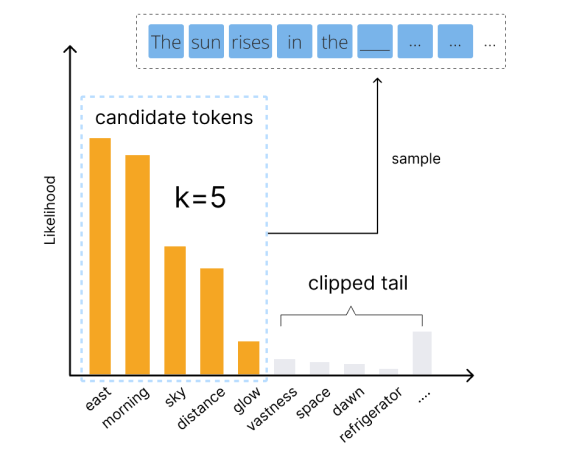

Или сэмлировать с температурой:

$$w_{next} \sim {P(w_{next} | X) ^ {1 / \tau} \over \sum_{\hat w} P(\hat w | X) ^ {1 / \tau}}$$

Где $\tau > 0$ - температура. Если $\tau << 1$, более вероятные токены будут сэмплироваться с большей вероятностью, а менее вероятные - с меньшей.

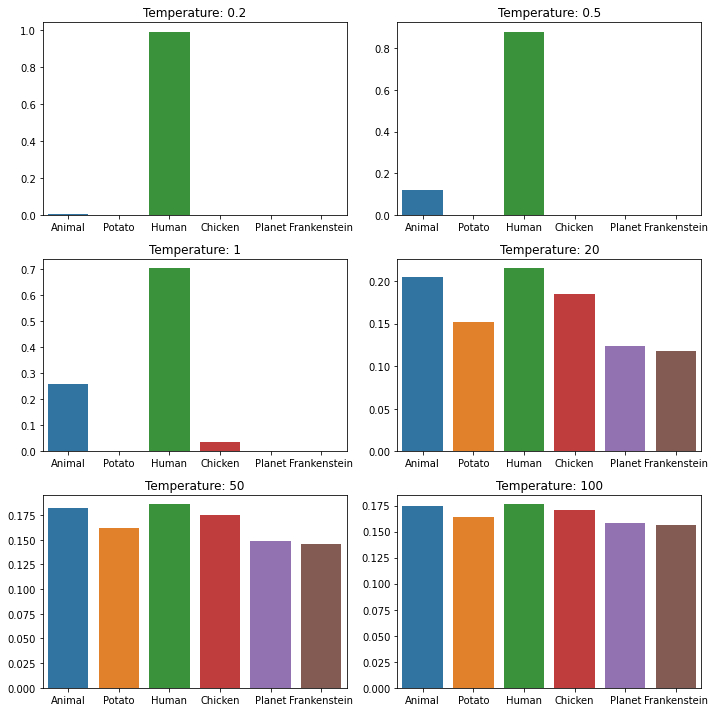

... или использовать Nucleus Sampling - ядерное сэмплирование - похожая идея на топ-k сэмплирование, но $k$ теперь выбирается динамически. В ядерном сэмплировании мы сэмплируем из top-__N%__ вероятностного распределения.

Например, при вероятностях токенов $p=[0.1, 0.35, 0.05, 0.2, 0.3]$ и N=0.89, сэмплированные токены выглядят как:
1. наиболее вероятный токен $w_2$, так как $p(w_2) < N$
2. второй наиболее вероятный токен $w_5$, $p(w_2) + p(w_5) = 0.65 < N$
3. третий наиболее вероятный токен $w_4$ because $p(w_2) + p(w_5) + p(w_4) = 0.85 < N$

И на этом все, так как добавление любого следующего токена переполнит возможное предельное значение (N): $p(w_2) + p(w_5) + p(w_4) + p(w_1) = 0.95 > N$.

После выбора токенов ядерным сэмплированием, необходимо нормализовать их и сэмплировать следующий токен


In [ ]:
import numpy as np
from typing import List, Optional

import matplotlib.pyplot as plt

import torch
import torch.nn.functional as F

from transformers import GPT2LMHeadModel, GPT2Tokenizer

In [ ]:
class TemperatureSampler:
    def __init__(self, model, tokenizer):
        self.model = model
        self.tokenizer = tokenizer
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.model.to(self.device)

    def sample_with_temperature(
        self,
        logits: torch.Tensor,
        temperature: float = 1.0,
        top_k: Optional[int] = None,
        top_p: Optional[float] = None
    ) -> int:
        # Применяем температуру
        if temperature != 1.0:
            logits = logits / temperature

        # Top-k фильтрация
        if top_k is not None and top_k > 0:
            indices_to_remove = logits < torch.topk(logits, top_k)[0][..., -1, None]
            logits[indices_to_remove] = -float('Inf')

        # Top-p фильтрация
        if top_p is not None and top_p < 1.0:
            sorted_logits, sorted_indices = torch.sort(logits, descending=True)
            cumulative_probs = torch.cumsum(F.softmax(sorted_logits, dim=-1), dim=-1)

            sorted_indices_to_remove = cumulative_probs > top_p
            sorted_indices_to_remove[..., 1:] = sorted_indices_to_remove[..., :-1].clone()
            sorted_indices_to_remove[..., 0] = 0

            indices_to_remove = sorted_indices_to_remove.scatter(
                dim=-1, index=sorted_indices, src=sorted_indices_to_remove
            )
            logits[indices_to_remove] = -float('Inf')

        probs = F.softmax(logits, dim=-1)
        next_token = torch.multinomial(probs, num_samples=1)

        return next_token.item()

    def generate(
        self,
        prompt: str,
        max_length: int = 50,
        temperature: float = 1.0,
        top_k: Optional[int] = 50,
        top_p: Optional[float] = 0.9,
        num_return_sequences: int = 1
    ) -> List[str]:

        self.model.eval()
        results = []

        input_ids = self.tokenizer.encode(prompt, return_tensors='pt').to(self.device)

        for _ in range(num_return_sequences):
            generated = input_ids.clone()

            with torch.no_grad():
                for _ in range(max_length):
                    outputs = self.model(generated)
                    logits = outputs.logits[0, -1, :]

                    # Сэмплируем следующий токен
                    next_token_id = self.sample_with_temperature(
                        logits, temperature, top_k, top_p,
                    )

                    # Добавляем токен к последовательности
                    next_token = torch.tensor([[next_token_id]]).to(self.device)
                    generated = torch.cat([generated, next_token], dim=1)

                    # Проверяем на EOS токен
                    if next_token_id == self.tokenizer.eos_token_id:
                        break

            # Декодируем результат
            generated_text = self.tokenizer.decode(
                generated[0], skip_special_tokens=True
            )
            results.append(generated_text)

        return results

    def visualize_temperature_effect(self, prompt: str, temperatures: List[float]):
        self.model.eval()

        input_ids = self.tokenizer.encode(prompt, return_tensors='pt').to(self.device)

        with torch.no_grad():
            outputs = self.model(input_ids)
            logits = outputs.logits[0, -1, :]

        top_k = 20
        top_logits, top_indices = torch.topk(logits, top_k)

        fig, axes = plt.subplots(1, len(temperatures), figsize=(15, 5))

        for idx, temp in enumerate(temperatures):
            scaled_logits = top_logits / temp if temp != 0 else top_logits
            probs = F.softmax(scaled_logits, dim=-1).cpu().numpy()

            tokens = [self.tokenizer.decode([i]) for i in top_indices.cpu()]

            ax = axes[idx] if len(temperatures) > 1 else axes
            ax.bar(range(len(probs[:10])), probs[:10])
            ax.set_xlabel('Token Index')
            ax.set_ylabel('Probability')
            ax.set_title(f'Temperature = {temp}')
            ax.set_xticks(range(len(probs[:10])))
            ax.set_xticklabels([f'{t[:8]}...' if len(t) > 8 else t
                                for t in tokens[:10]], rotation=45, ha='right')

        plt.tight_layout()
        plt.show()


Промпт: 'Искусственный интеллект - это'


 Температура = 0.1
----------------------------------------
Пример 1: Искусственный интеллект - это искусственный интеллект, который может быть использован для решения задач, которые не могут быть решены человеком. Искусственный интеллект может быть использован для решения задач, которые



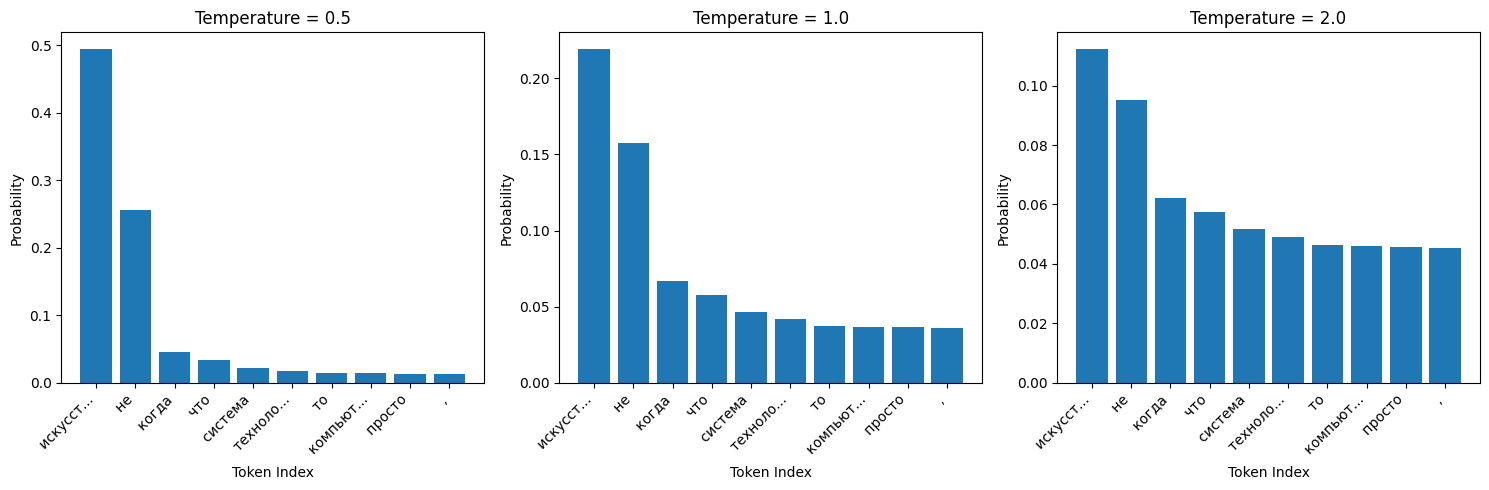

Пример 2: Искусственный интеллект - это искусственный интеллект, который может быть использован для решения задач, которые не могут быть решены человеком.
Искусственный интеллект - это искусственный интеллект, который



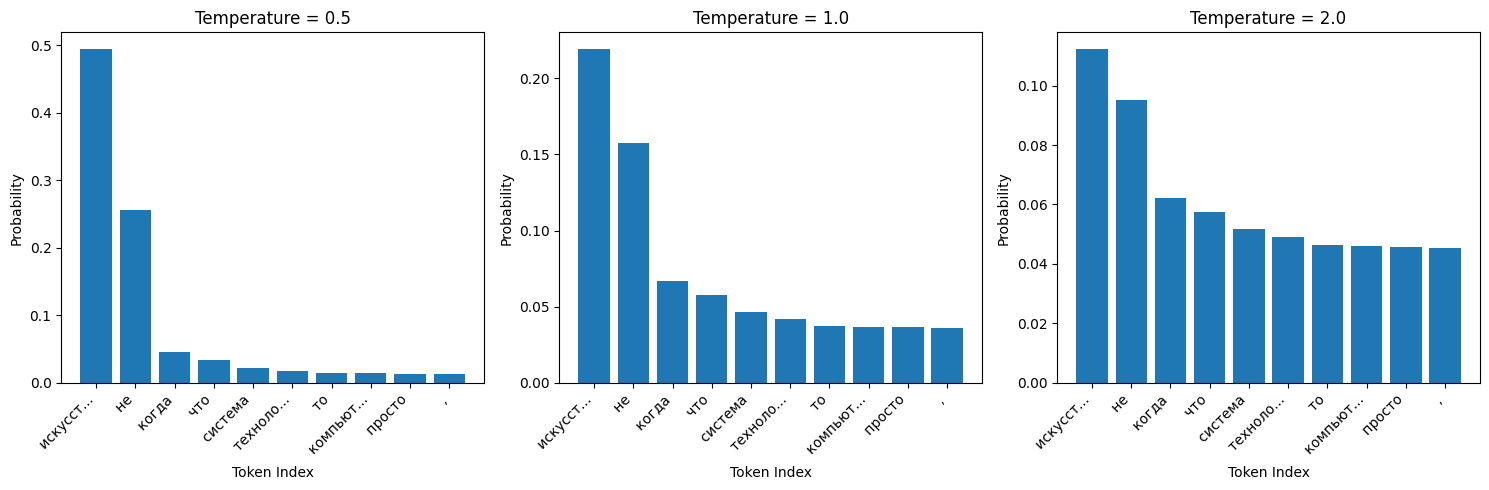


 Температура = 0.5
----------------------------------------
Пример 1: Искусственный интеллект - это когда все, что нужно, делает человек, а искусственный интеллект - это когда все, что нужно, делает машина.
Если бы вы могли выбирать



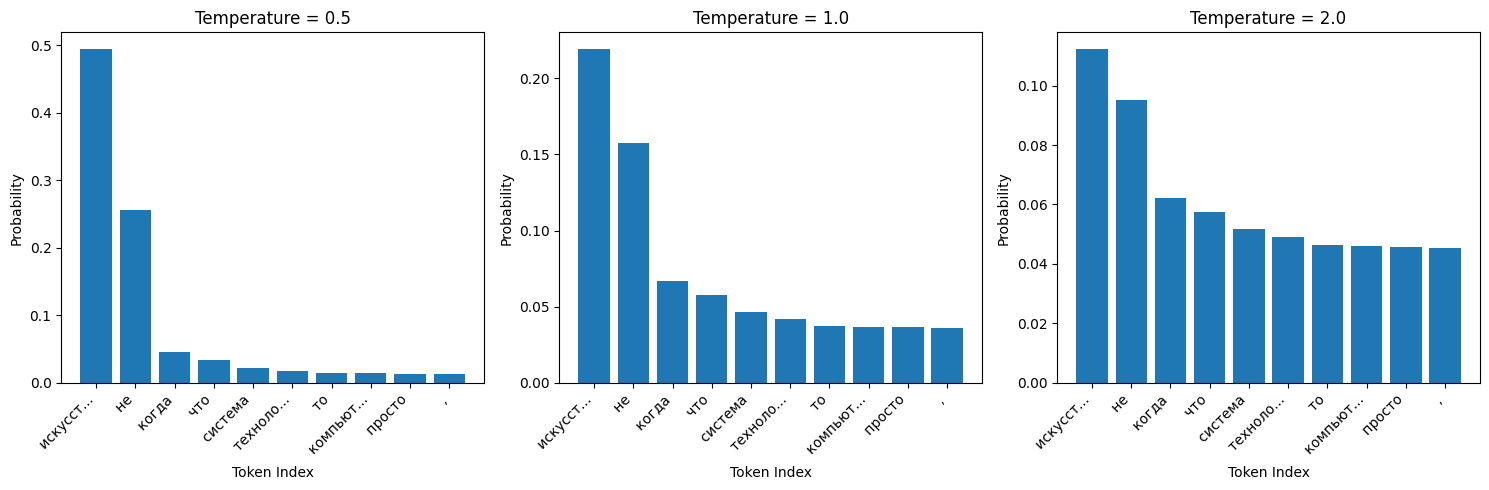

Пример 2: Искусственный интеллект - это не просто искусственный интеллект, это - искусственный разум. Искусственный интеллект - это не просто искусственный интеллект, это - искусственный разум. Искусственный интеллект - это



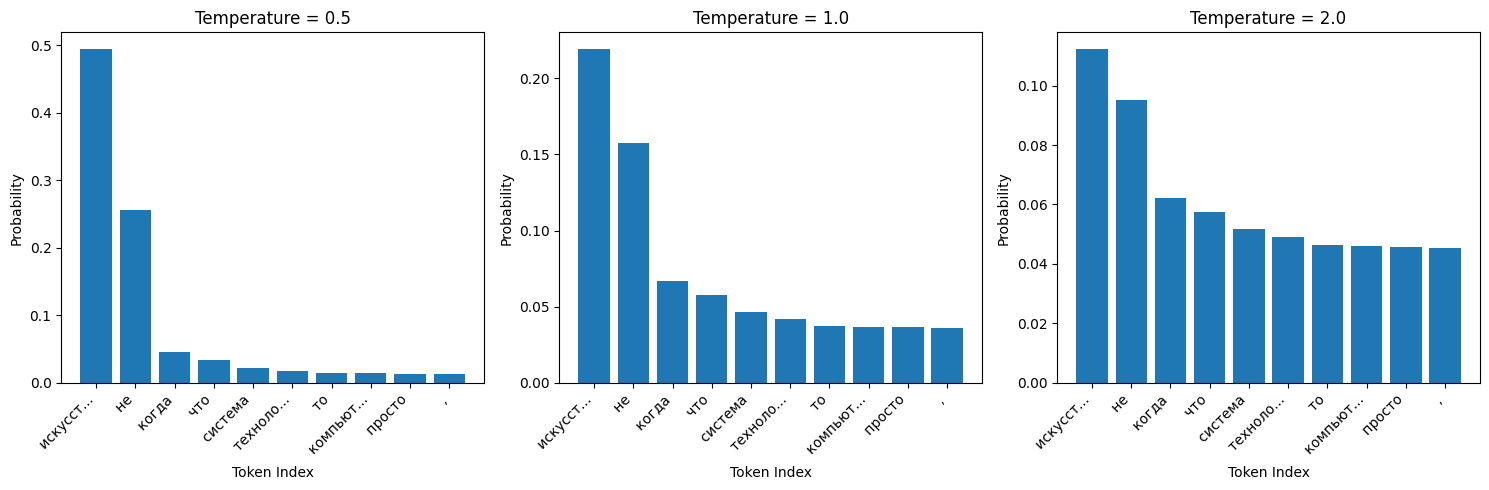


 Температура = 1.0
----------------------------------------
Пример 1: Искусственный интеллект - это способность машины делать невозможное и делать это быстрее.
Пожалуйста помогите... кто реально может, очень нужно. Пожалуйста!
Копите на



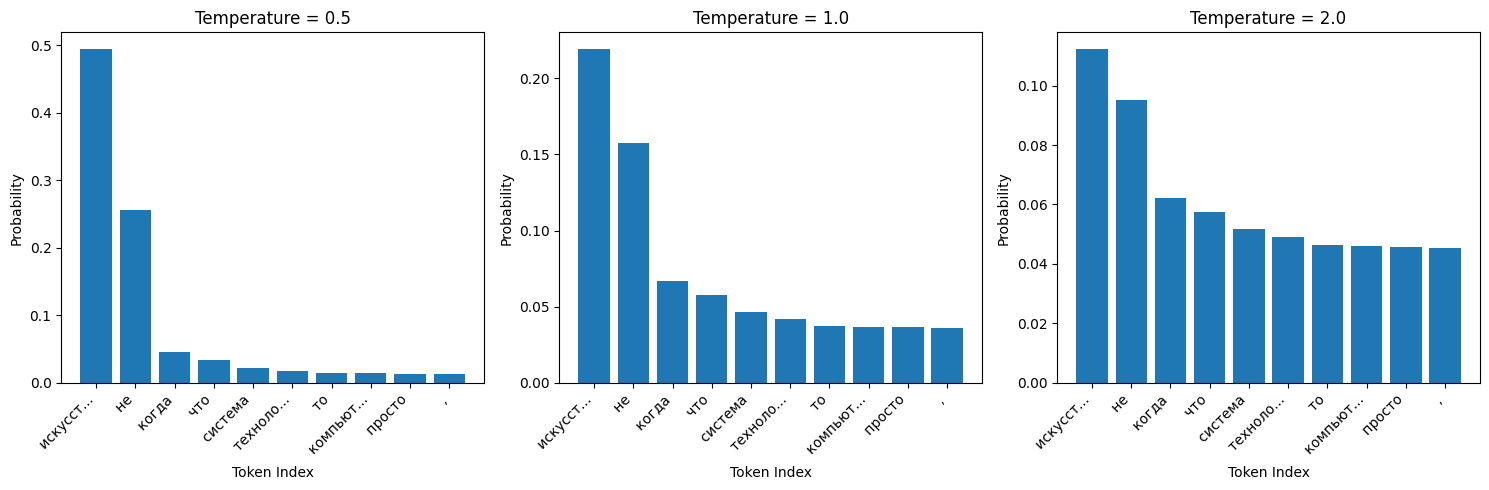

Пример 2: Искусственный интеллект - это новая система, которая позволит человеку, не имея на это финансовых средств, стать самостоятельным собственником своей жизни.
Пользователь, который считает себя



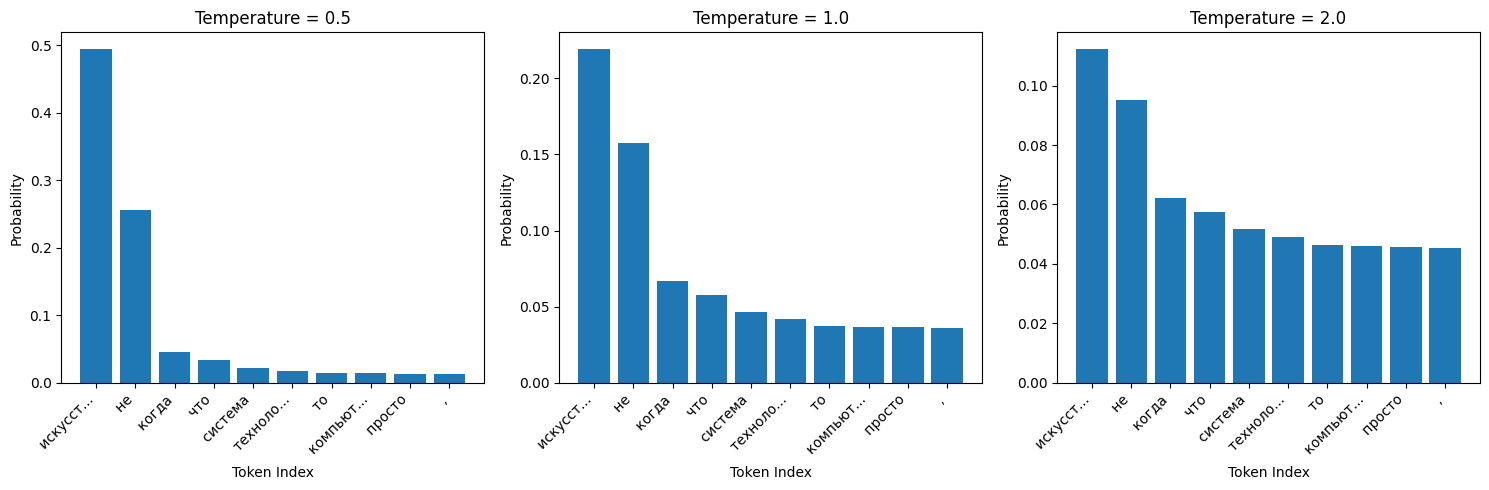


 Температура = 1.5
----------------------------------------
Пример 1: Искусственный интеллект - это процесс, а не прибор. Интеллектом обладает человек, потому что природа на это не дает ответа (хотя бы из соображений секретности!). Искусственный



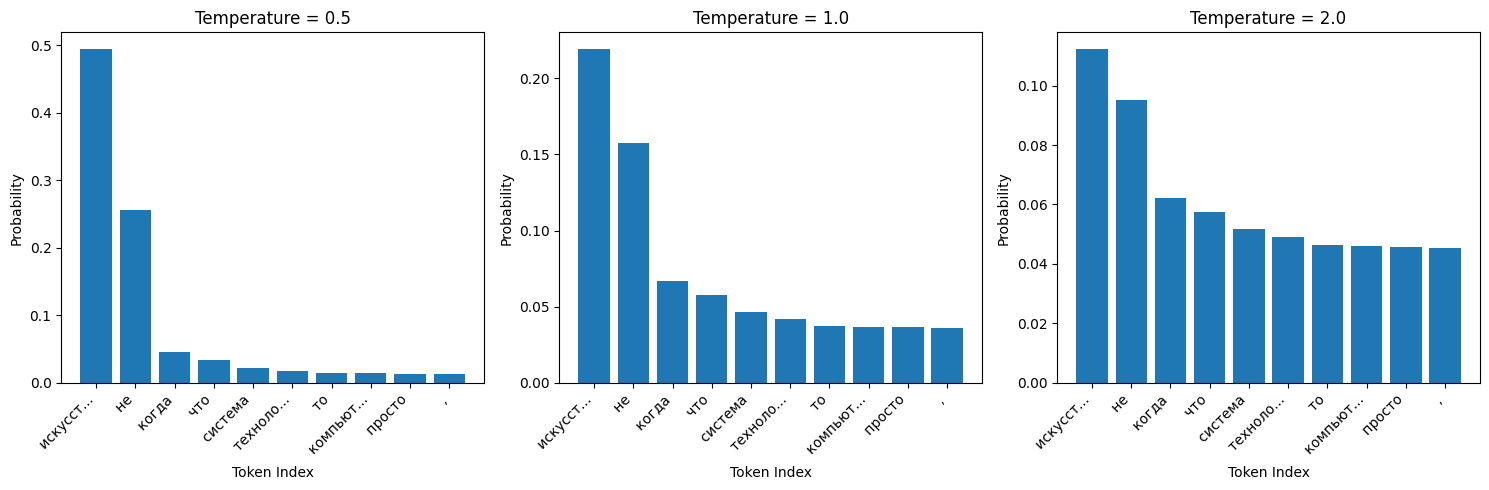

Пример 2: Искусственный интеллект - это система, которая, будучи встроенной в человеческий мозг, помогает нам выполнять определенные функции, но не имеет никаких целей. С точки зрения искусственным интеллектом



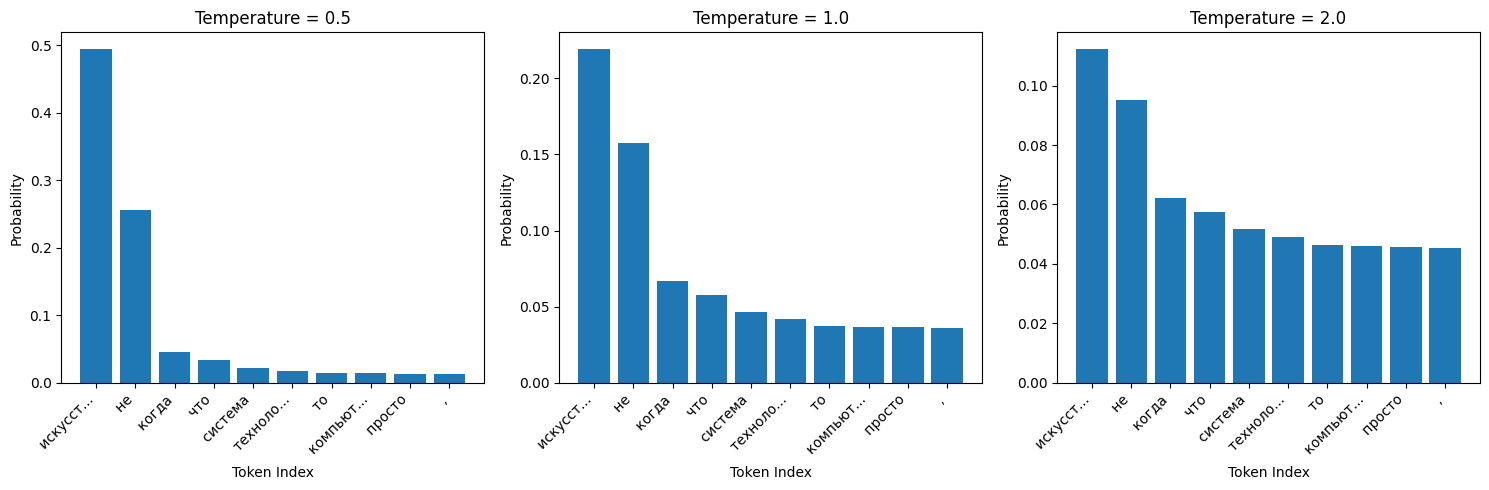


 Температура = 2.0
----------------------------------------
Пример 1: Искусственный интеллект - это технология управления роботами-автолюбителями. Суть такого развития управления (робототипов?) следующая. Роботы научились работать автономными серво



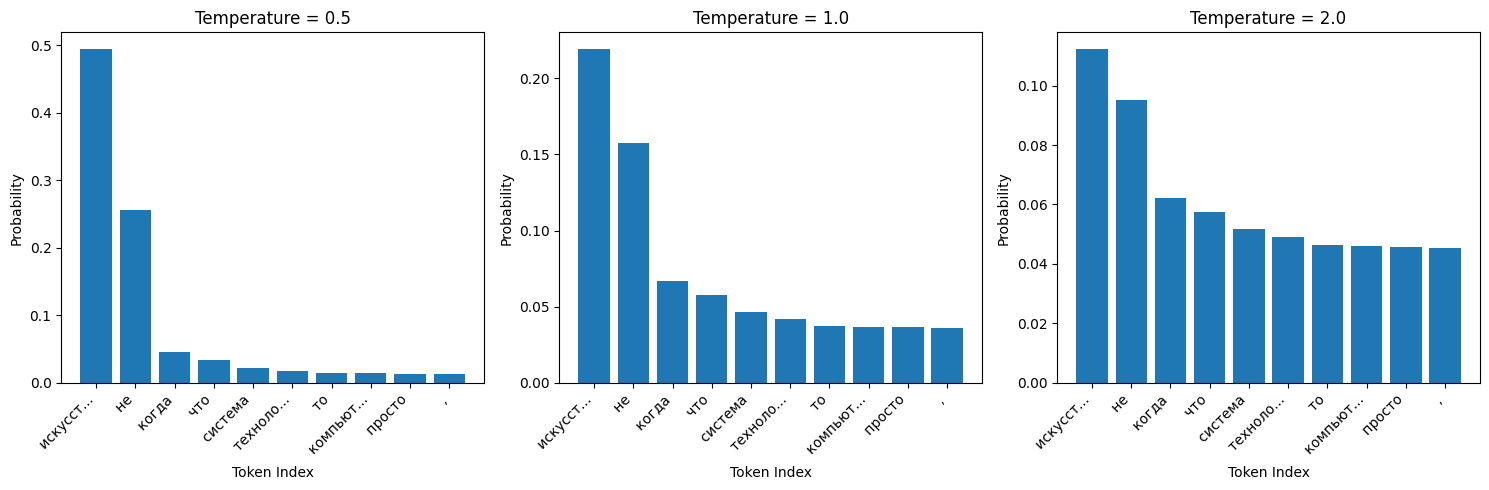

Пример 2: Искусственный интеллект - это такой человек, он, безусловно, лучше любого живого - его жизнь наполнена настоящим удовольствием, потому что это такая сложная жизнь.
Какими преимущества



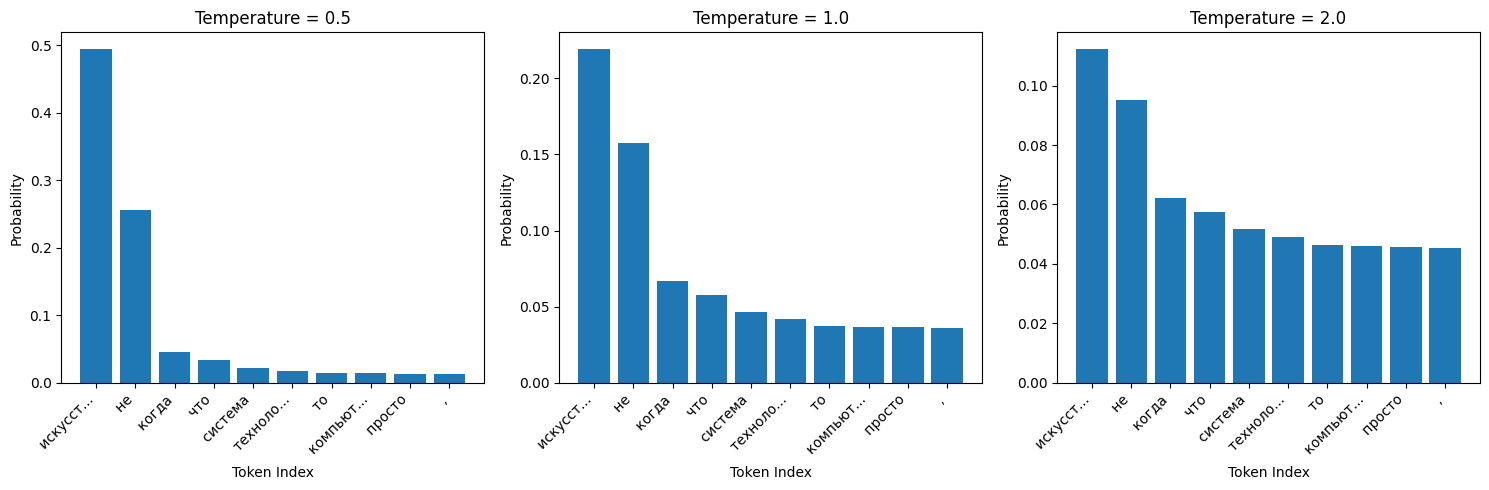

In [ ]:
model_name = "ai-forever/rugpt3large_based_on_gpt2"

tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

if tokenizer.pad_token is None:
      tokenizer.pad_token = tokenizer.eos_token

sampler = TemperatureSampler(model, tokenizer)

prompt = "Искусственный интеллект - это"

print(f"\nПромпт: '{prompt}'\n")
print("=" * 80)

temperatures = [0.1, 0.5, 1.0, 1.5, 2.0]

for t in temperatures:
  print(f"\n Температура = {t}")
  print("-" * 40)

  results = sampler.generate(
    prompt=prompt,
    max_length=30,
    temperature=t,
    top_k=50,
    top_p=0.9,
    num_return_sequences=2
  )

  for i, text in enumerate(results, 1):
    print(f"Пример {i}: {text}")

    print("\n" + "=" * 80)
    sampler.visualize_temperature_effect(prompt, [0.5, 1.0, 2.0])

### Beam Search

Иногда нам не нужно, чтобы модель генерировала разнообразные результаты, так как мы хотим получить один лучший вариант с учетом префикса.

Чтобы найти наиболее вероятную последовательность, содержащую 10 токенов,  нужно будет проверить все $|V|^{10}$ возможных гипотез. Однако можно найти приблизительный наиболее вероятный результат с помощью **beam search**.

Как это работает:
0. Инициализируем `beam` = [prefix], max beam_size = k
1. for T steps:
2. ` ... ` генерируем все возможные токены для всех гипотез в beam, `len(beam) * len(vocab)` кандидатов
3. ` ... ` выбираем `beam_size` лучших кандидатов как новый `beam`
4. Выбираем лучшую гипотезу из beam

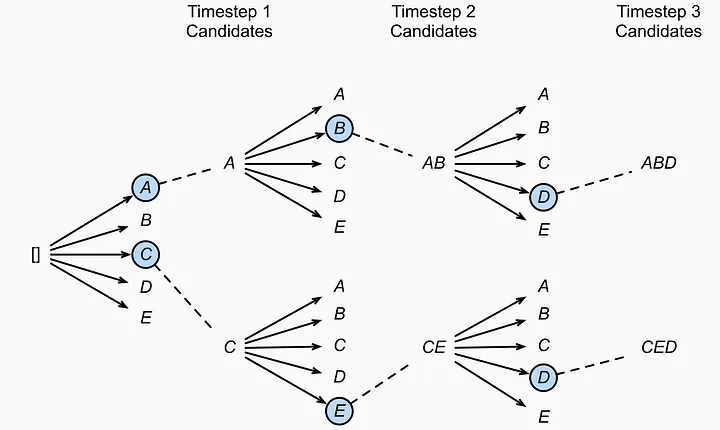

### Сбалансированное Min-p сэмплирование

[Turning Up the Heat: Min-p Sampling for Creative and Coherent LLM Outputs](https://arxiv.org/abs/2407.01082)

1. Выбирается токен с наибольшей вероятностью — $P_{max}$;

2. Гиперпараметр метода — базовый порог вероятности, $P_{base}$ (авторы рекомендуют выбирать между 0,05 и 0,1) — умножается на $P_{max}$, и получается порог отсечки — $P_{scaled}$. По нему отсекаются токены, всё, что ниже, выкидывается;

3. Формируется пул для семплирования из оставшихся токенов;

4. Вероятности нормализуются.

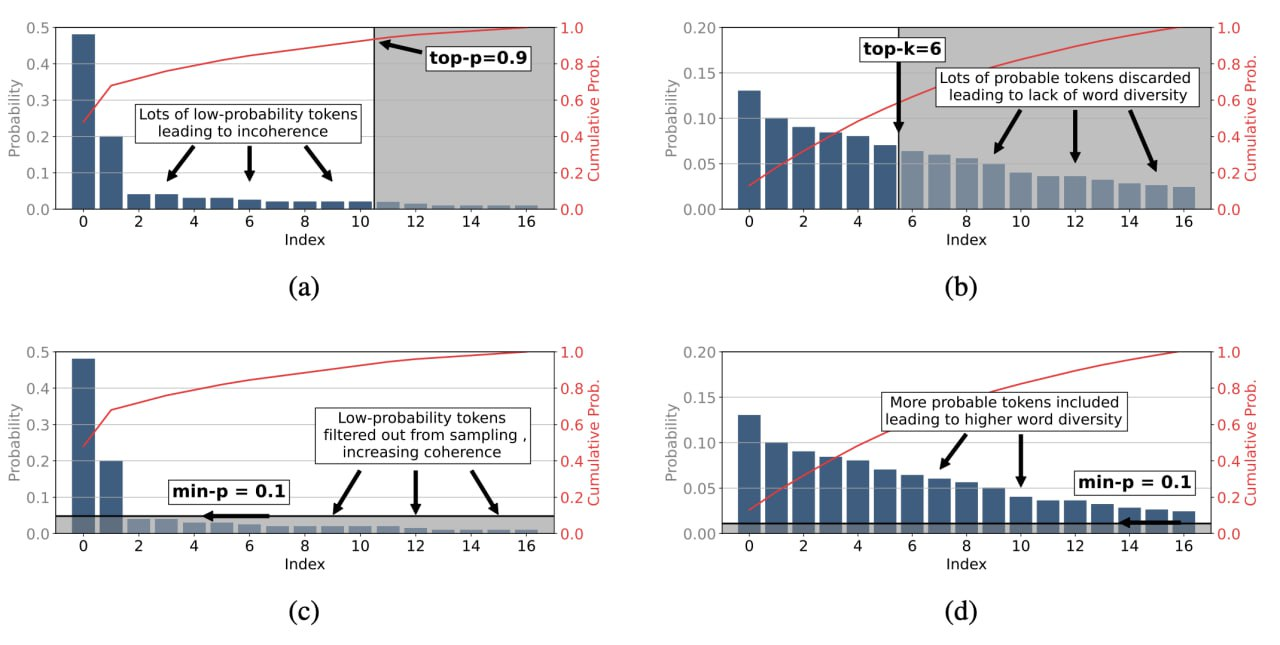

### Некоторые тонкости при настройке сэмплирования

- Для креативных задач имеет смысл использовать более высокие значения температуры (1.5-2.0) в сочетании с nucleus sampling (p=0.9-0.95) или min-p sampling (0.05-0.1).

- Для факто-ориентированных задач предпочтительны более низкие температуры (0.1-0.7) с более консервативными настройками top-k или top-p для обеспечения точности.

- Информационная плотность текста также влияет на выбор параметров. Плотные технические тексты требуют более строгой фильтрации токенов, в то время как разговорная речь может использовать более свободные настройки для поддержания естественности.

- Для длинных форм генерации **Contrastive search** показывает превосходные результаты в поддержании когерентности на протяжении длинных последовательностей.

**Порядок применения параметров**

- Порядок применения различных техник сэмплирования имеет значение. Стандартный порядок: temperature → top-k → top-p → repetition penalty. Изменение этого порядка может привести к неожиданным результатам.

- Одновременное использование top-k и top-p может создавать конфликты. Если top-k значительно меньше количества токенов, отфильтрованных top-p, то top-k становится доминирующим фактором, потенциально сводя на нет преимущества nucleus sampling

- При очень низкой температуре (< 0.5) nucleus sampling становится менее эффективным, поскольку распределение уже сильно сконцентрировано на нескольких токенах. Высокая температура (> 1.5) может сделать top-p чрезмерно инклюзивным


## Full finetuning

In [ ]:
import os
import torch
from transformers import (
    GPT2LMHeadModel,
    GPT2Tokenizer,
    Trainer,
    TrainingArguments,
    DataCollatorForLanguageModeling,
    set_seed
)
from datasets import load_dataset

In [ ]:
os.environ['WANDB_DISABLED'] = 'true'
os.environ['WANDB_MODE'] = 'disabled'

In [ ]:
set_seed(42)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
model_name = "ai-forever/rugpt3medium_based_on_gpt2"
output_dir = "rugpt3-poetry-finetuned"

In [ ]:
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
tokenizer.pad_token = tokenizer.eos_token

dataset = load_dataset("AnyaSchen/russian_poetry_with_keywords")
dataset

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/574 [00:00<?, ?B/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'author', 'keywords'],
        num_rows: 7755
    })
})

In [ ]:
dataset["train"][5]

{'text': 'Прочёл.\nПошёл.\nМинуты с три –\nопять застрял\nу двух витрин.\nКакникак,\nа к школьным зданьям\nпришёл\nс огромным опозданьем.\nДверь на ключ.\nТолкнулся Влас –\nне пускают Власа\nв класс!\n',
 'author': 'Маяковский',
 'keywords': "['класс', 'дверь', 'прочесть', 'толкнуться', 'застрять']"}

In [ ]:
dataset.unique("author"), len(dataset['train'])

({'train': ['Маяковский', 'Тютчев', 'Блок', 'Eceнин', 'Пушкин']}, 7755)

In [ ]:
context_length = 128

outputs = tokenizer(
        dataset["train"][:2]['text'],
        truncation=True,
        max_length=context_length,
        return_overflowing_tokens=True,
        return_length=True,
)
outputs

{'overflowing_tokens': [[], []], 'num_truncated_tokens': [-66, -54], 'input_ids': [[677, 1145, 21984, 1864, 271, 2931, 510, 203, 353, 6094, 8339, 16, 203, 436, 2237, 4939, 811, 16, 203, 19051, 806, 13513, 28925, 18, 203, 6039, 282, 15959, 203, 42126, 18, 203, 443, 450, 717, 1004, 306, 1992, 16, 203, 44969, 34890, 392, 5, 203, 443, 2255, 3809, 505, 16, 203, 307, 4411, 203, 404, 3005, 203, 431, 2133, 7238, 18, 203], [1295, 23262, 30260, 309, 30770, 16, 203, 1212, 39753, 203, 2575, 288, 4920, 339, 203, 273, 1519, 16, 203, 275, 1808, 16, 203, 24333, 203, 5719, 485, 4272, 203, 32827, 331, 203, 1821, 414, 30760, 18, 203, 5798, 203, 280, 26212, 1073, 37832, 203, 413, 8293, 42306, 16, 9666, 460, 16, 203, 370, 1577, 203, 350, 1898, 975, 30, 203, 443, 21032, 5, 443, 203, 3001, 510, 203, 7774, 6833, 309, 9209, 18, 203]], 'length': [62, 74], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
dataset['train'][0]

{'text': 'Влас Прогулкин —\nмилый мальчик,\nспать ложился,\nвзяв журнальчик.\nВсе в журнале\nинтересно.\n– Дочитаю весь,\nхоть тресну!\n– Ни отец его,\nни мать\nне могли\nзаставить спать.\n',
 'author': 'Маяковский',
 'keywords': "['спать', 'журнальчик', 'заставить', 'мальчик', 'мать']"}

In [ ]:
def tokenize(example):
    outputs = tokenizer(
        example['text'],
        truncation=True,
        max_length=context_length,
        return_overflowing_tokens=True,
        return_length=True,
    )

    input_batch = []
    for length, input_ids in zip(outputs["length"], outputs["input_ids"]):
        if length == context_length:
            input_batch.append(input_ids)
    return {"input_ids": input_batch}


tokenized_data = dataset.map(
    tokenize, batched=True, remove_columns=dataset["train"].column_names
)
tokenized_data

Map:   0%|          | 0/7755 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['input_ids'],
        num_rows: 1369
    })
})

In [ ]:
model = GPT2LMHeadModel.from_pretrained(model_name)
model.config.n_ctx = context_length
model_size = sum(t.numel() for t in model.parameters())
model_size

config.json:   0%|          | 0.00/761 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.73G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.73G [00:00<?, ?B/s]

355871744

In [ ]:
data_collator = DataCollatorForLanguageModeling(tokenizer, mlm=False)

In [ ]:
out = data_collator([tokenized_data["train"][i] for i in range(5)])
for key in out:
    print(f"{key} shape: {out[key].shape}")

input_ids shape: torch.Size([5, 128])
attention_mask shape: torch.Size([5, 128])
labels shape: torch.Size([5, 128])


In [ ]:
def generation(model, tokenizer):
    model.eval()
    model = model.to(device)

    prompts = [
        "Весна, весна!",
        "Августовский вечер",
        "Море, волны и "
    ]

    print("\n" + "="*50)

    for prompt in prompts:
        inputs = tokenizer.encode(prompt, return_tensors='pt').to(device)

        with torch.no_grad():
            outputs = model.generate(
                inputs,
                max_length=256,
                num_return_sequences=1,
                temperature=0.8,
                do_sample=True,
                top_p=0.9,
                top_k=50,
                repetition_penalty=1.2,
                pad_token_id=tokenizer.pad_token_id,
                eos_token_id=tokenizer.eos_token_id
            )

        generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)

        print(generated_text)
        print("="*50)

In [ ]:
generation(model, tokenizer)

The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.



Весна, весна! Пора любви и счастья!"  

Кругом цветы - тюльпаны, нарциссы... Но почему-то в сердце тоска. От тоски хочется петь, но никто не услышит меня… Я бы хотела услышать голос любимой песни под аккомпанемент этого прекрасного органа, который звучит по всей России каждый день с утра до вечера: «С днем рожденья тебя поздравляем!» И пусть у нас все будет хорошо! Мы ведь любим друг друга!!! В День рождения моей семьи мы желаем Вам всего самого наилучшего!!!!!! Будьте счастливы вместе!!!
И конечно же: Здоровья, Любви и Долголетия вам всем!!!!!!!!
Пусть сбудутся мечты о хорошем успехе (хотя бы на бумаге)....

Posted via LjBeetle
Комментарии скрыты.
Я только знаю что песня эта очень популярная и её знают миллионы людей по всему миру, а значит она тоже может стать частью вашего личного праздника!
Удачи!!!


27455249	nagibaigoro	2014-07-22 18:39:00	Что нужно знать об украинском майдане? Оригинал взят у  в Что необходимо знать об украинском майдане?Не так давно я писал пост
Августовский в

In [ ]:
args = TrainingArguments(
    output_dir=output_dir,
    per_device_train_batch_size=2,
    per_device_eval_batch_size=16,
    gradient_accumulation_steps=4,
    warmup_steps=50,
    save_strategy="steps",
    save_steps=500,
    num_train_epochs=2,
    weight_decay=0.1,
    lr_scheduler_type="cosine",
    optim="adamw_torch",
    learning_rate=5e-4,
    fp16=torch.cuda.is_available(),
)

trainer = Trainer(
    model=model,
    tokenizer=tokenizer,
    args=args,
    data_collator=data_collator,
    train_dataset=tokenized_data["train"],
)

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
/tmp/ipython-input-3103839852.py:19: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
trainer.train()

`loss_type=None` was set in the config but it is unrecognised.Using the default loss: `ForCausalLMLoss`.


Step,Training Loss


TrainOutput(global_step=344, training_loss=2.9789056112599925, metrics={'train_runtime': 225.6044, 'train_samples_per_second': 12.136, 'train_steps_per_second': 1.525, 'total_flos': 635695625404416.0, 'train_loss': 2.9789056112599925, 'epoch': 2.0})

In [ ]:
generation(model, tokenizer)


Весна, весна!
Кружимся в тумане, свистя на метели.
На улице снежной – вечерний свет.
Скукаешь ли ты под окном своим?
Всплеск ледяных брызг и звонко бьет твой лед.
Ты идешь по улицам скользкими шагами;
Но как же странно: я вижу тебя...
И вот, проходя с твоей улыбкой нежной,
Я увидел слезы твои без ресниц...
Что ж теперь?!– Я подошел к окну твоему...
Льдина за льдиной звякнула о лед.
Знакомый голос меня прервал твое молчанье:
«Завтра... завтра... Я жду...»
И вдруг из твоих глаз моих струится слезинка.
И я, глядя в сумрак ночных улиц туманных,
Увидел вас вдвоем... Как будто две тени скользящие...
Так мы не любим друг друга, но я понял вас!..
Вы прошли... Вы – в сумрачней дня... И над вами вздыхает вьюга...
Моей любви нет... Но есть счастье... – и она в глазах ваших...
Мы идем... Мы идем до ночными шагами... Звезды гаснут... звезды гасли... Звезды погасших звезд...
Только
Августовский вечер,
          время звездных минут.
Твой поцелуй – и ночь без огня, —
и ты уходишь от меня...
И я с мо